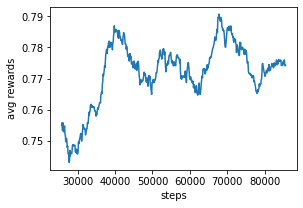

In [6]:
import matplotlib.pyplot as plt
import os
import numpy as np

import pickle
import matplotlib.pyplot as plt
import pickle
import os


def load_logs(log_path):
    total_logs = []
    with open(log_path, 'rb') as f:
        while True:
            try:
                total_logs.append(pickle.load(f))
            except EOFError:
                break

    train_steps = [log['time/total_timesteps'] for log in total_logs]
    # train_avg_rews = [log['rollout/ep_rew_mean'] for log in total_logs]
    train_len_rews = [log['rollout/ep_len_mean'] for log in total_logs]
    train_avg_rews = [log['rollout/ep_rew_mean'] / train_len_rews[i] for i, log in enumerate(total_logs)]
    actor_loss = [log['train/actor_loss'] for log in total_logs]
    value_loss = [log['train/critic_loss'] for log in total_logs]

    return actor_loss, value_loss,train_steps, train_avg_rews, train_len_rews
actor_loss, value_loss, train_steps, train_avg_rews, train_len_rews = load_logs("logger.pickle")
fig, ax = plt.subplots(figsize =(15,3))
plt.subplot(131)
plt.plot(train_steps[7000:7600], train_avg_rews[7000:7600])
plt.xlabel("steps")
plt.ylabel("avg rewards")
# plt.subplot(132)
# plt.plot(train_steps, actor_loss)
# plt.xlabel("steps")
# plt.ylabel("actor loss")
# plt.subplot(133)
# plt.plot(train_steps, value_loss)
# plt.xlabel("steps")
# plt.ylabel("value loss")
plt.show()

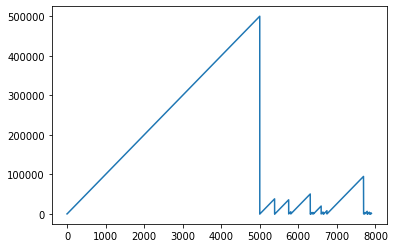

In [7]:
plt.plot(train_steps)